In [ ]:
import pandas as pd
import numpy as np
import re
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('spam.csv', encoding='latin-1') # Read the CSV without specifying columns
# Print the actual column names for inspection
print(df.columns)
# Assuming your columns are named 'Category' and 'Message' based on the uploaded content:
df = df[['Category', 'Message']]  # Select the correct column names
df.columns = ['label', 'message']  # Rename columns as desired
df.head()

Saving spam.csv to spam.csv
Index(['Category', 'Message'], dtype='object')


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned'] = df['message'].apply(preprocess_text)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)



MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.967713004484305

📊 Confusion Matrix:
 [[966   0]
 [ 36 113]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
# Sample inputs for testing the spam detector
test_messages = [
    "Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/123456 to claim now.",
    "Hi, just wanted to check if we are still meeting tomorrow at 3 PM.",
    "Free entry in 2 a weekly competition to win FA Cup final tkts. Text FA to 87121 to enter.",
    "Hey mom, I’ll be home late from college today. Don’t worry!",
    "URGENT! Your mobile number has won 2000 cash prize. Call 09061701461 now!"
]

for message in test_messages:
    print(f"✉️ Message: {message}")
    cleaned = preprocess_text(message)
    vect = vectorizer.transform([cleaned])
    pred = model.predict(vect)

    if pred[0] == 1:
        print("🔒 Prediction: This is a SPAM message!\n")
    else:
        print("✅ Prediction: This is a HAM (not spam) message.\n")


✉️ Message: Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/123456 to claim now.
✅ Prediction: This is a HAM (not spam) message.

✉️ Message: Hi, just wanted to check if we are still meeting tomorrow at 3 PM.
✅ Prediction: This is a HAM (not spam) message.

✉️ Message: Free entry in 2 a weekly competition to win FA Cup final tkts. Text FA to 87121 to enter.
🔒 Prediction: This is a SPAM message!

✉️ Message: Hey mom, I’ll be home late from college today. Don’t worry!
✅ Prediction: This is a HAM (not spam) message.

✉️ Message: URGENT! Your mobile number has won 2000 cash prize. Call 09061701461 now!
🔒 Prediction: This is a SPAM message!



In [ ]:
# 📧 Spam Email Detection with Basic UI in Colab

# ✅ Section 1: Install & Import
import pandas as pd
import numpy as np
import re
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import ipywidgets as widgets
from IPython.display import display, clear_output

# ✅ Section 2: Upload & Load Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('spam.csv', encoding='latin-1')[['label', 'message']]
df.columns = ['label', 'message']

# ✅ Section 3: Preprocess Text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned'] = df['message'].apply(preprocess_text)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# ✅ Section 4: TF-IDF & Split
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Section 5: Train Model
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n📈 Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ✅ Section 6: Interactive User Interface

# Create widgets
text_input = widgets.Textarea(
    value='',
    placeholder='Enter your email message here...',
    description='Email:',
    layout=widgets.Layout(width='100%', height='100px')
)

button = widgets.Button(description="Predict", button_style='success')
output = widgets.Output()

# Prediction function
def on_button_click(b):
    with output:
        clear_output()
        user_input = text_input.value
        if not user_input.strip():
            print("⚠️ Please enter an email message.")
            return
        cleaned = preprocess_text(user_input)
        vect = vectorizer.transform([cleaned])
        pred = model.predict(vect)
        if pred[0] == 1:
            print("🔒 Prediction: This is a SPAM message!")
        else:
            print("✅ Prediction: This is a HAM (not spam) message.")

button.on_click(on_button_click)

print("\n💬 Spam Detector Interface")
display(text_input, button, output)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving spam.csv to spam (1).csv


KeyError: "None of [Index(['label', 'message'], dtype='object')] are in the [columns]"

In [ ]:
# ✅ Section 2: Upload & Load Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('spam.csv', encoding='latin-1') # Read the CSV without specifying columns
# Print the actual column names for inspection
print(df.columns)
# Assuming your columns are named 'Category' and 'Message' based on the uploaded content:
df = df[['Category', 'Message']]  # Select the correct column names
df.columns = ['label', 'message']  # Rename columns as desired

Saving spam.csv to spam (2).csv
Index(['Category', 'Message'], dtype='object')


In [ ]:
# ✅ Section 3: Preprocess Text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned'] = df['message'].apply(preprocess_text)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
# ✅ Section 4: TF-IDF & Split
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ✅ Section 5: Train Model
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n📈 Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


📈 Model Evaluation
Accuracy: 0.967713004484305
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
# ✅ Section 6: Interactive User Interface

# Create widgets
text_input = widgets.Textarea(
    value='',
    placeholder='Enter your email message here...',
    description='Email:',
    layout=widgets.Layout(width='100%', height='100px')
)

button = widgets.Button(description="Predict", button_style='success')
output = widgets.Output()

# Prediction function
def on_button_click(b):
    with output:
        clear_output()
        user_input = text_input.value
        if not user_input.strip():
            print("⚠️ Please enter an email message.")
            return
        cleaned = preprocess_text(user_input)
        vect = vectorizer.transform([cleaned])
        pred = model.predict(vect)
        if pred[0] == 1:
            print("🔒 Prediction: This is a SPAM message!")
        else:
            print("✅ Prediction: This is a HAM (not spam) message.")

button.on_click(on_button_click)

print("\n💬 Spam Detector Interface")
display(text_input, button, output)


💬 Spam Detector Interface


Textarea(value='', description='Email:', layout=Layout(height='100px', width='100%'), placeholder='Enter your …

Button(button_style='success', description='Predict', style=ButtonStyle())

Output()

In [ ]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.967713004484305
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
from IPython.display import display, HTML, Javascript, clear_output

# HTML and CSS for UI
html_ui = """
<style>
    .container {
        max-width: 700px;
        margin: 30px auto;
        padding: 20px;
        background: #f4f4f4;
        border-radius: 10px;
        box-shadow: 0 4px 8px rgba(0,0,0,0.2);
        font-family: 'Segoe UI', sans-serif;
    }
    textarea {
        width: 100%;
        height: 120px;
        padding: 12px;
        font-size: 16px;
        border-radius: 6px;
        border: 1px solid #ccc;
        resize: vertical;
    }
    button {
        background-color: #4CAF50;
        color: white;
        padding: 12px 20px;
        border: none;
        border-radius: 6px;
        cursor: pointer;
        font-size: 16px;
        margin-top: 10px;
    }
    button:hover {
        background-color: #45a049;
    }
    .output {
        margin-top: 20px;
        padding: 15px;
        font-size: 18px;
        font-weight: bold;
        border-radius: 6px;
    }
</style>

<div class="container">
    <h2>📧 Spam Email Detector</h2>
    <textarea id="emailInput" placeholder="Enter your email message here..."></textarea>
    <br>
    <button onclick="sendToPython()">Predict</button>
    <div id="predictionResult" class="output"></div>
</div>

<script>
    function sendToPython() {
        var input = document.getElementById("emailInput").value;
        google.colab.kernel.invokeFunction('predict_email', [input], {});
    }
</script>
"""

display(HTML(html_ui))


THE FINAL EXECUTION

In [ ]:
from google.colab import output as colab_output

# Define callback function
def predict_email(user_input):
    clear_output(wait=True)
    display(HTML(html_ui))  # Refresh UI

    if not user_input.strip():
        print("⚠️ Please enter a message!")
        return

    cleaned = preprocess_text(user_input)
    vect = vectorizer.transform([cleaned])
    pred = model.predict(vect)

    result_html = ""
    if pred[0] == 1:
        result_html = "<div style='color: red;'>🔒 This is a <strong>SPAM</strong> message!</div>"
    else:
        result_html = "<div style='color: green;'>✅ This is a <strong>HAM</strong> (not spam) message.</div>"

    js = f"""
        <script>
        document.getElementById("predictionResult").innerHTML = `{result_html}`;
        </script>
    """
    display(HTML(js))

# Bind the callback to the frontend
colab_output.register_callback('predict_email', predict_email)


In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
# spam_detector_app.py

import streamlit as st
import pandas as pd
import re
import string
import joblib
from nltk.corpus import stopwords
from nltk import download
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Setup
st.set_page_config(page_title="Spam Email Detector", layout="centered")
download('stopwords')
stop_words = set(stopwords.words('english'))

# Title
st.title("📧 Spam Email Detector")
st.markdown("Enter an email message to check if it's **SPAM** or **HAM**.")

# Preprocess function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

# Load trained model and vectorizer
@st.cache_resource
def load_model():
    df = pd.read_csv('spam.csv', encoding='latin-1')[['Category', 'Message']]
    df.columns = ['label', 'message']
    df['cleaned'] = df['message'].apply(preprocess_text)
    df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['cleaned'])
    y = df['label_num']

    model = MultinomialNB()
    model.fit(X, y)

    return model, vectorizer

model, vectorizer = load_model()

# User input
user_input = st.text_area("✉️ Email Content", height=150, placeholder="Type or paste your email here...")

if st.button("🔍 Predict"):
    if user_input.strip():
        cleaned = preprocess_text(user_input)
        vect = vectorizer.transform([cleaned])
        prediction = model.predict(vect)

        if prediction[0] == 1:
            st.error("🔒 This is a **SPAM** message!")
        else:
            st.success("✅ This is a **HAM** (not spam) message.")
    else:
        st.warning("Please enter an email message to analyze.")


2025-04-17 01:03:33.214 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-04-17 01:03:33.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-17 01:03:33.217 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-17 01:03:33.218 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-17 01:03:33.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-17 01:03:33.222 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-17 01:03:33.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')[['Category', 'Message']]


In [ ]:
import streamlit as st
import pandas as pd
import re
import string
import joblib
from nltk.corpus import stopwords
from nltk import download
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Setup
st.set_page_config(page_title="Spam Email Detector", layout="centered")
download('stopwords')
stop_words = set(stopwords.words('english'))

# Title
st.title("📧 Spam Email Detector")
st.markdown("Enter an email message to check if it's **SPAM** or **HAM**.")

# Preprocess function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

# Load trained model and vectorizer
@st.cache_resource
def load_model():
    df = pd.read_csv('spam.csv', encoding='latin-1') # Read the entire CSV

    # Get the actual column names
    actual_columns = df.columns.tolist()

    # Print actual columns for debugging
    print(f"Actual columns in CSV: {actual_columns}")

    # Assuming 'Category' and 'Message' are the correct names:
    df = df[['Category', 'Message']] #Use actual column names
    df.columns = ['label', 'message']
    df['cleaned'] = df['message'].apply(preprocess_text)
    df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['cleaned'])
    y = df['label_num']

    model = MultinomialNB()
    model.fit(X, y)

    return model, vectorizer

model, vectorizer = load_model()

# User input
user_input = st.text_area("✉️ Email Content", height=150, placeholder="Type or paste your email here...")

if st.button("🔍 Predict"):
    if user_input.strip():
        cleaned = preprocess_text(user_input)
        vect = vectorizer.transform([cleaned])
        prediction = model.predict(vect)

        if prediction[0] == 1:
            st.error("🔒 This is a **SPAM** message!")
        else:
            st.success("✅ This is a **HAM** (not spam) message.")
    else:
        st.warning("Please enter an email message to analyze.")

2025-04-17 01:03:37.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-04-17 01:03:37.517 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-17 01:03:37.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-17 01:03:37.519 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-17 01:03:37.521 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-17 01:03:37.525 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-17 01:03:37.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.

Actual columns in CSV: ['Category', 'Message']


In [ ]:
code = '''
import streamlit as st
import pandas as pd
import re
import string
import joblib
from nltk.corpus import stopwords
from nltk import download
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Setup
st.set_page_config(page_title="Spam Email Detector", layout="centered")
download('stopwords')
stop_words = set(stopwords.words('english'))

# Title
st.title("📧 Spam Email Detector")
st.markdown("Enter an email message to check if it's **SPAM** or **HAM**.")

# Preprocess function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

# Load trained model and vectorizer
@st.cache_resource
def load_model():
    df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
    df.columns = ['label', 'message']
    df['cleaned'] = df['message'].apply(preprocess_text)
    df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['cleaned'])
    y = df['label_num']

    model = MultinomialNB()
    model.fit(X, y)

    return model, vectorizer

model, vectorizer = load_model()

# User input
user_input = st.text_area("✉️ Email Content", height=150, placeholder="Type or paste your email here...")

if st.button("🔍 Predict"):
    if user_input.strip():
        cleaned = preprocess_text(user_input)
        vect = vectorizer.transform([cleaned])
        prediction = model.predict(vect)

        if prediction[0] == 1:
            st.error("🔒 This is a **SPAM** message!")
        else:
            st.success("✅ This is a **HAM** (not spam) message.")
    else:
        st.warning("Please enter an email message to analyze.")
'''

with open("spam_detector_app.py", "w") as f:
    f.write(code)

print("✅ File 'spam_detector_app.py' created.")


✅ File 'spam_detector_app.py' created.


In [ ]:
from google.colab import files
files.download("spam_detector_app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1')
print(df.columns)


Index(['Category', 'Message'], dtype='object')


In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1', header=None)
print(df.head())


          0                                                  1
0  Category                                            Message
1       ham  Go until jurong point, crazy.. Available only ...
2       ham                      Ok lar... Joking wif u oni...
3      spam  Free entry in 2 a wkly comp to win FA Cup fina...
4       ham  U dun say so early hor... U c already then say...


In [ ]:
import pandas as pd

def load_model():
    df = pd.read_csv('spam.csv', encoding='latin-1', header=0)
    df.columns = ['Category', 'Message']  # Rename columns properly
    df = df[['Category', 'Message']]  # Select only necessary columns

    # Continue with your preprocessing/model logic
    ...


In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1', skiprows=1, names=['Category', 'Message'])


In [ ]:
df['Category']  # Labels
df['Message']   # Text data


,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ã¼ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy: {:.2f}%".format(accuracy * 100))

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 98.03%
Precision: 1.0
Recall: 0.8523489932885906
F1-Score: 0.9202898550724637

Confusion Matrix:
 [[966   0]
 [ 22 127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



<ipython-input-39-ce7c3a39d70d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette=colors)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


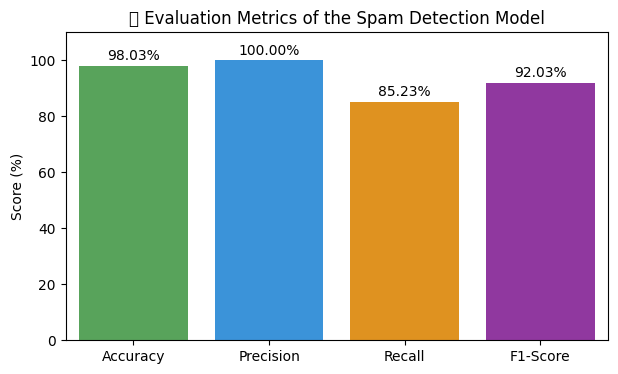

In [ ]:
# Convert scores to percentage
accuracy_percent = accuracy * 100
precision_percent = precision * 100
recall_percent = recall * 100
f1_percent = f1 * 100

# Plot bar chart
plt.figure(figsize=(7, 4))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy_percent, precision_percent, recall_percent, f1_percent]
colors = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0']

sns.barplot(x=metrics, y=scores, palette=colors)
plt.ylim(0, 110)
plt.ylabel('Score (%)')
plt.title('✅ Evaluation Metrics of the Spam Detection Model')
for i, score in enumerate(scores):
    plt.text(i, score + 1, f'{score:.2f}%', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


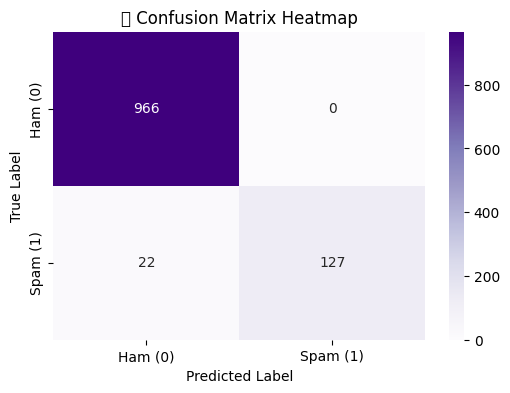

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Ham (0)', 'Spam (1)'],
            yticklabels=['Ham (0)', 'Spam (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('📊 Confusion Matrix Heatmap')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128231 (\N{E-MAIL SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


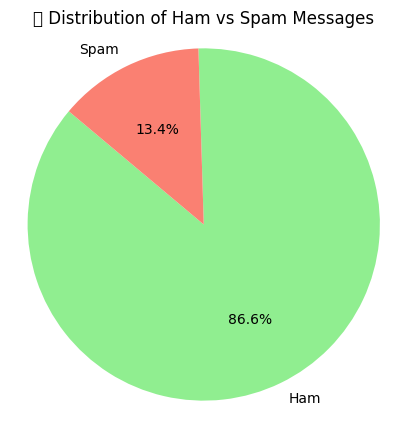

In [ ]:
label_counts = df['Category'].value_counts()
labels = ['Ham', 'Spam']
colors = ['lightgreen', 'salmon']

plt.figure(figsize=(5, 5))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('📧 Distribution of Ham vs Spam Messages')
plt.axis('equal')
plt.show()


<ipython-input-46-dd960d28df62>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


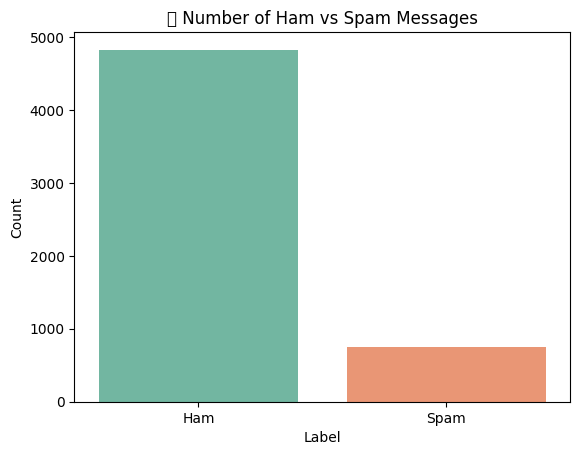

In [ ]:
sns.countplot(x='Category', data=df, palette='Set2')
plt.title('📊 Number of Ham vs Spam Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()
